# Natural Language Processing (part 2)

- Capture context
- Word frequency
- Lemmatization

Download <a href="https://drive.google.com/file/d/1Agjn0OXmm8KDgPllVjm6ZzbGLjhvwdbG/view?usp=share_link">transcripts from a January 6th Hearing.</a>


In [2]:
## import libraries
import spacy
import pandas as pd
import glob


In [3]:
## run this list
fruits = ["apple", "banana", "cherry", "fig"]
fruits

['apple', 'banana', 'cherry', 'fig']

In [4]:
# Without enumerate

print("With enumerate:")
for fruit in fruits:
    print(fruit)


With enumerate:
apple
banana
cherry
fig


In [6]:
# With enumerate
for i, fruit in enumerate(fruits):
    print(f"Index position {i}: {fruit}")

Index position 0: apple
Index position 1: banana
Index position 2: cherry
Index position 3: fig


## Capture Context

In the January 6th Hearing transcripts, I want to capture any sentence that has the word "Trump".

In [7]:
## pull in transcript
my_file ="jan6-transcript.txt"
my_file

'jan6-transcript.txt'

In [9]:
## read it into text
## preprocess to lowercase

with open(my_file, "r") as f:
    all_text = f.read().lower()
all_text

'here\'s every word from the 8th jan. 6 committee on its investigation\njuly 22, 20226:27 pm et\n \nmatt pottinger, former deputy national security adviser, and sarah matthews, former white house deputy press secretary, are sworn in to testify as the house select committee investigating the jan. 6 attack on the u.s. capitol holds a hearing on thursday.\npatrick semansky/ap\nbelow, read the full transcript from the july 12 hearing of the house select committee investigating the jan. 6 capitol attack. the transcript was produced by cq.\n\nliz cheney: the committee will be in order.\n\nbennie thompson: good evening. earlier this week, i received a positive covid diagnosis. per cdc guidelines, i\'ve received the initial two shots and all of the boosters. thus far, i have been blessed to experience very minimal symptoms. because i\'m still quarantined, i cannot participate in person with my colleagues. i\'ve asked our vice chair, ms. cheney, to preside over this evening\'s hearing, includin

In [14]:
trump_list = []
for sentence in all_text.split("."):
    if "trump" in sentence:
        trump_list.append(sentence)
        
trump_list

['\n\nfor the weeks between the november election and january 6th, donald trump was a force to be reckoned with',
 ' and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior',
 " we also remind you of what was happening at the capitol minute by minute, as the final violent, tragic part of donald trump's scheme to cling to power unraveled while he ignored his advisers, stood by, and watched it unfold on television",
 ' there can be no doubt that there was a coordinated, multistep effort to overturn an election overseen and directed by donald trump',
 ' these facts have gone undisputed, and so there needs to be accountability, accountability under the law, accountability to the american people, accountability at every level, from the local precincts in many states where donald trump and his allies attacked election workers for just doing their jobs, all the way up to the oval office, where donald trump embraced the le

In [10]:
## Trump in sentence
[sentence for sentence in all_text.split(".") if "trump" in sentence]

['\n\nfor the weeks between the november election and january 6th, donald trump was a force to be reckoned with',
 ' and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior',
 " we also remind you of what was happening at the capitol minute by minute, as the final violent, tragic part of donald trump's scheme to cling to power unraveled while he ignored his advisers, stood by, and watched it unfold on television",
 ' there can be no doubt that there was a coordinated, multistep effort to overturn an election overseen and directed by donald trump',
 ' these facts have gone undisputed, and so there needs to be accountability, accountability under the law, accountability to the american people, accountability at every level, from the local precincts in many states where donald trump and his allies attacked election workers for just doing their jobs, all the way up to the oval office, where donald trump embraced the le

### Need context

To gather some of the context around the word "trump", we could capture the sentences that come before and after our target. 



### Apply ```enumerate``` to grab context

In [18]:
len(sentences)

1389

In [27]:
## list with all sentences
sentences = all_text.split(".") ## store all sentences in a list
# type(sentences)

## create empty to store all the results
context_sentences = []

## iterate via enumerate
for i, sentence in enumerate(sentences):
    ## check if "trump" in current sentence
    if "trump" in sentence:
        prev_sentence = sentences[i-1] if i-0 > 0 else "NO PREVIOUS LINE"
        next_sentence = sentences[i+1] if i+1 <len(sentences) else "NO NEXT LINE"
        context_sentences.append((prev_sentence.strip(),
                                 sentence.strip(),
                                 next_sentence.strip()))

        


No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump
No mention of Trump


In [29]:
len(context_sentences)

197

In [24]:
# Show full content without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [26]:
## Create df with columns
df = pd.DataFrame(context_sentences)
df.columns = ["prev_s", "target", "next_s"]


,prev_s,target,next_s
0,"afterward, on january 6th when he knew that the assembled mob was heavily armed and angry, he commanded the mob to go to the capitol, and he emphatically commanded the heavily armed mob to fight like hell","for the weeks between the november election and january 6th, donald trump was a force to be reckoned with",he shrugged off the factuality and legality correct sober advice of his knowledgeable and sensible advisers
1,"for 187 minutes on january 6th, this man of unbridled destructive energy could not be moved, not by his aides, not by his allies, not by the violent chants of rioters, or the desperate pleas of those facing down the riot","and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior","even though he was the only person in the world who could call off the mob he sent to the capitol, he could not be moved to rise from his dining room table and walk the few steps down the white house hallway into the press briefing room, where cameras were anxiously and desperately waiting to carry his message to the armed and violent mob savagely beating and killing law enforcement officers ravaging the capitol and hunting down the vice president and various members of congress"
2,"luria of virginia, will take you inside the white house during those 187 minutes","we also remind you of what was happening at the capitol minute by minute, as the final violent, tragic part of donald trump's scheme to cling to power unraveled while he ignored his advisers, stood by, and watched it unfold on television",let me offer a final thought about the select committee's work so far
3,"but as that work goes forward, a number of facts are clear","there can be no doubt that there was a coordinated, multistep effort to overturn an election overseen and directed by donald trump","there can be no doubt that he commanded a mob, a mob he knew was heavily armed, violent, and angry, to march on the capitol to try to stop the peaceful transfer of power"
4,and he made targets out of his own vice president and the lawmakers gathered to do the people's work,"these facts have gone undisputed, and so there needs to be accountability, accountability under the law, accountability to the american people, accountability at every level, from the local precincts in many states where donald trump and his allies attacked election workers for just doing their jobs, all the way up to the oval office, where donald trump embraced the legal advice of insurrectionists that a federal judge has already said was a coup in search of a legal theory",our democracy withstood the attack on january 6th
5,"he has expertly led us through eight hearings so far, and he has brought us to the point we are today","in our initial hearing, the chairman and i described what ultimately became donald trump's seven part plan to overturn the 2020 presidential election, a plan stretching from before election day through january 6th","at the close of today's hearing, our ninth, we will have addressed each element of that plan"
6,"we have far more evidence to share with the american people and more to gather, so our committee will spend august pursuing emerging information on multiple fronts before convening further hearings this september","today we know far more about the president's plans and actions to overturn the election than almost all members of congress did when president trump was impeached on january 13th, 2021 or when he was tried by the senate in february of that year","57 of 100 senators voted to convict president trump at that time, and more than 20 others said they were voting against conviction because the president's term had already expired"
7,"today we know far more about the president's plans and actions to overturn the election than almost all members of congress did when president trump was impeached on january 13th, 2021 or when he was tried by the senate in february of that year","57

In [30]:
## call df
df

,prev_s,target,next_s
0,"afterward, on january 6th when he knew that the assembled mob was heavily armed and angry, he commanded the mob to go to the capitol, and he emphatically commanded the heavily armed mob to fight like hell","for the weeks between the november election and january 6th, donald trump was a force to be reckoned with",he shrugged off the factuality and legality correct sober advice of his knowledgeable and sensible advisers
1,"for 187 minutes on january 6th, this man of unbridled destructive energy could not be moved, not by his aides, not by his allies, not by the violent chants of rioters, or the desperate pleas of those facing down the riot","and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior","even though he was the only person in the world who could call off the mob he sent to the capitol, he could not be moved to rise from his dining room table and walk the few steps down the white house hallway into the press briefing room, where cameras were anxiously and desperately waiting to carry his message to the armed and violent mob savagely beating and killing law enforcement officers ravaging the capitol and hunting down the vice president and various members of congress"
2,"luria of virginia, will take you inside the white house during those 187 minutes","we also remind you of what was happening at the capitol minute by minute, as the final violent, tragic part of donald trump's scheme to cling to power unraveled while he ignored his advisers, stood by, and watched it unfold on television",let me offer a final thought about the select committee's work so far
3,"but as that work goes forward, a number of facts are clear","there can be no doubt that there was a coordinated, multistep effort to overturn an election overseen and directed by donald trump","there can be no doubt that he commanded a mob, a mob he knew was heavily armed, violent, and angry, to march on the capitol to try to stop the peaceful transfer of power"
4,and he made targets out of his own vice president and the lawmakers gathered to do the people's work,"these facts have gone undisputed, and so there needs to be accountability, accountability under the law, accountability to the american people, accountability at every level, from the local precincts in many states where donald trump and his allies attacked election workers for just doing their jobs, all the way up to the oval office, where donald trump embraced the legal advice of insurrectionists that a federal judge has already said was a coup in search of a legal theory",our democracy withstood the attack on january 6th
5,"he has expertly led us through eight hearings so far, and he has brought us to the point we are today","in our initial hearing, the chairman and i described what ultimately became donald trump's seven part plan to overturn the 2020 presidential election, a plan stretching from before election day through january 6th","at the close of today's hearing, our ninth, we will have addressed each element of that plan"
6,"we have far more evidence to share with the american people and more to gather, so our committee will spend august pursuing emerging information on multiple fronts before convening further hearings this september","today we know far more about the president's plans and actions to overturn the election than almost all members of congress did when president trump was impeached on january 13th, 2021 or when he was tried by the senate in february of that year","57 of 100 senators voted to convict president trump at that time, and more than 20 others said they were voting against conviction because the president's term had already expired"
7,"today we know far more about the president's plans and actions to overturn the election than almost all members of congress did when president trump was impeached on january 13th, 2021 or when he was tried by the senate in february of that year","57

## Multi-word search with context

In [31]:
## pre-process text
all_text = all_text.lower()

In [ ]:
## not for coding - just demo typing

all_hearings = ["jan6-hearing1.txt", "jan6-hearing2.txt", "jan6-hearing3.txt"]
target_words = ["mob", "trump", "white house", "capitol", "proud boys"]

for hearing in all_hearings:
    sentences = hearings.split('.')
    for target_word in target_words
    

In [34]:
## Code here

sentences = all_text.split(".")
target_words = ["mob", "trump", "white house", "capitol", "proud boys"]

context_sentences = []
for target_word in target_words:
    for i, sentence in enumerate(sentences):
        # check for target word
        if target_word in sentence:
            prev_sentence = sentences[i-1] if i-0 > 0 else "NO PREVIOUS LINE"
            next_sentence = sentences[i+1] if i+1 <len(sentences) else "NO NEXT LINE"
            context_sentences.append((target_word, prev_sentence.strip(),
                                 sentence.strip(),
                                 next_sentence.strip()))


In [35]:
## create df with column
df = pd.DataFrame(context_sentences)
df.columns = ["search_terms", "prev_s", "sentence", "next_s"]
df

,search_terms,prev_s,sentence,next_s
0,mob,he tried to destroy our democratic institutions,he summoned a mob to washington,"afterward, on january 6th when he knew that the assembled mob was heavily armed and angry, he commanded the mob to go to the capitol, and he emphatically commanded the heavily armed mob to fight like hell"
1,mob,he summoned a mob to washington,"afterward, on january 6th when he knew that the assembled mob was heavily armed and angry, he commanded the mob to go to the capitol, and he emphatically commanded the heavily armed mob to fight like hell","for the weeks between the november election and january 6th, donald trump was a force to be reckoned with"
2,mob,"and more tellingly, donald trump ignored and disregarded the desperate pleas of his own family, including ivanka and don junior","even though he was the only person in the world who could call off the mob he sent to the capitol, he could not be moved to rise from his dining room table and walk the few steps down the white house hallway into the press briefing room, where cameras were anxiously and desperately waiting to carry his message to the armed and violent mob savagely beating and killing law enforcement officers ravaging the capitol and hunting down the vice president and various members of congress",he could not be moved
3,mob,"there can be no doubt that there was a coordinated, multistep effort to overturn an election overseen and directed by donald trump","there can be no doubt that he commanded a mob, a mob he knew was heavily armed, violent, and angry, to march on the capitol to try to stop the peaceful transfer of power",and he made targets out of his own vice president and the lawmakers gathered to do the people's work
4,mob,"at the time, the republican leader of the united states senate said this about donald trump",[begin videotape]\n\nmitch mcconnell: a mob was assaulting the capitol in his name,"these criminals were carrying his banners, hanging his flags, and screaming their loyalty to him"
5,mob,only one thing was achieving president trump's goal,"the angry, armed mob president trump sent to the capitol broke through security, invaded the capitol, and forced the vote counting to stop","that mob was violent and destructive, and many came armed"
6,mob,"the angry, armed mob president trump sent to the capitol broke through security, invaded the capitol, and forced the vote counting to stop","that mob was violent and destructive, and many came armed","as you will hear, secret service agents protecting the vice president were exceptionally concerned about his safety and their own"
7,mob,but the former president chose not to do what all of those people begged,"he refused to tell the mob to leave until 4:17, when he tweeted out a video statement filmed in the rose garden ending with this",[begin videotape]\n\ndonald trump: so go home
8,mob,this hearing is principally about what happened inside of the white house that afternoon,"from the time when president trump ended his speech until the moment when he finally told the mob to go home, a span of 187 minutes, more than three hours","what you will learn is that president trump sat in his dining room and watched the attack on television, while his senior most staff, closest advisors, and family members begged him to do what is expected of any american president"
9,mob,let's hear what they had to say,[begin videotape]\n\nkevin mccarthy: the president bears responsibility for wednesday's attack on congress by mob rioters,he should have immediately denounced the mob when he saw what was unfolding


In [37]:
df.query("search_terms == 'proud boys'")

,search_terms,prev_s,sentence,next_s
420,proud boys,"[end videotape]\n\nelaine luria: by this time, the vice president was in the capitol",the joint session of congress to certify joe biden's victory was underway and the proud boys and other rioters had stormed through the first barriers and begun the attack,radio communications from law enforcement informed secret service and those in the white house situation room of these developments in real time
421,proud boys,"moments later at 2:13, rioters broke into the capitol itself","one of the proud boys charged with seditious conspiracy, dominic pezzola, used an officer's shield to smash a window, and rioters flooded into the building","[begin videotape]\n\nunknown: [crowd noise] go, go, go, go"


## Word Frequency

In [ ]:
## import that language model
import en_core_web_sm

In [ ]:
## build nlp pipeline (a function will tokenize, parse and ner for us)
nlp = en_core_web_sm.load()

### Stop Words

- These are common words that add no additional meaning to our analysis.
- Words like ```the```, ```and``` and ```any```.
- Spacy has just over 326 ```stop words``` in its defalt library.
- Read more on <a href="https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47">stop words</a>

In [ ]:
## show all default stop words


In [ ]:
## check if a word (have, near, be, lol) is a stop word 



In [ ]:
## how many  stop words do we have?


In [ ]:
## Add your own stop word



In [ ]:
## CHECK IF 'lol' is a stop word


In [ ]:
## how many do stop words do we have now?


In [ ]:
## Remove a stop word from list because it is relevant.
## notice the word "lol" is a stop word.



In [ ]:
## CHECK IF 'empty' is a stop word


### Words frequency in our Jan. 6 hearing text

In [ ]:
## type all_text


In [ ]:
## run all text through nlp pipeline


In [ ]:
## show one token at a time


In [ ]:
## code here


# Lemmatization

In natural language processing, ```lemmatization``` is the process of reducing words to their base and removing their inflectional endings.



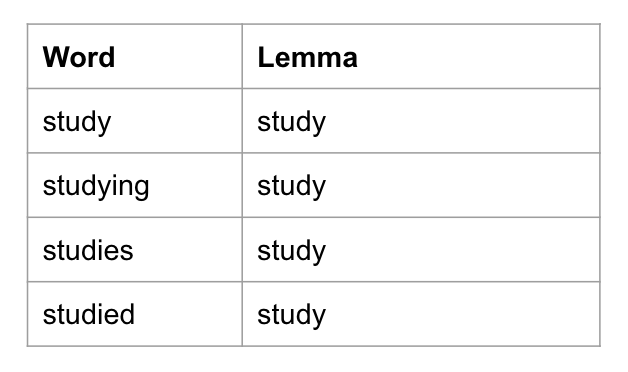

In [ ]:
## non-sense sample text with similar words
text = "I delivered the delivery and am always delivering \
my deliveries on time. \
He delivers late. This is my deliverance! \
This is a fragment of some fragments. \
When it was fragmented what happens to \
fragmentation or even fragmentations? \
The economic reality is that global economies \
are in for a rough time and people will find it \
difficult no matter how much they economize. "

In [ ]:
## create spacy object by running through NLP pipeline


In [ ]:
## lemmatize the words
## note how they have gone down to the root words




In [ ]:
## lemma via lc


In [ ]:
## call lemma list


In [ ]:
## type?


## Remove Stop words

In [ ]:
## pull out a word from list


In [ ]:
## is it a stopword?


## This will run through the entire lemmatized list but keep only words that are NOT stop words or punctuation and place in a list.

In [ ]:
## code here


In [ ]:
## Here are the non-stop words in the list



## Let's count their frequency

In [ ]:
## use counter to count the frequency of words in the terms list


In [ ]:
## type


In [ ]:
## pull out the 10 most frequently used words (roots, variations and all)
